In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'ProcessedData.csv'
data = pd.read_csv(path, sep=',', encoding='utf-8')
# Hiển thị mẫu
data.head()

,Unnamed: 0,timestamp,Temprature (Kelvin),Feels like (Kelvin),Pressure (mb),Humidity (%),Temperature Amplitude,Wind speed (m/s),Wind degree,Wind gust (m/s),...,Weather Description,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,0,1701388800,301.16,306.75,1011.0,89.0,0.0,0.51,0.0,0.0,...,scattered clouds,5.0,921.25,128.75,42.50,0.0,56.74,246.02,294.09,29.64
1,1,1701392400,301.16,306.75,1011.0,89.0,0.0,0.51,300.0,0.0,...,scattered clouds,5.0,4699.71,109.08,34.62,0.0,42.44,199.75,233.37,22.29
2,2,1701396000,301.16,306.75,1010.0,89.0,0.0,0.51,0.0,0.0,...,scattered clouds,5.0,3791.81,84.94,26.73,0.0,29.80,157.48,177.82,17.23
3,3,1701399600,300.16,304.35,1009.0,94.0,0.0,0.51,330.0,0.0,...,scattered clouds,5.0,3017.43,61.69,20.91,0.0,22.41,121.27,132.87,13.05
4,4,1701403200,299.16,299.16,1009.0,94.0,0.0,0.51,290.0,0.0,...,mist,5.0,2456.67,46.04,17.82,0.0,19.55,96.76,104.39,10.26


# 1. Heatmap (Tương quan giữa các biến)

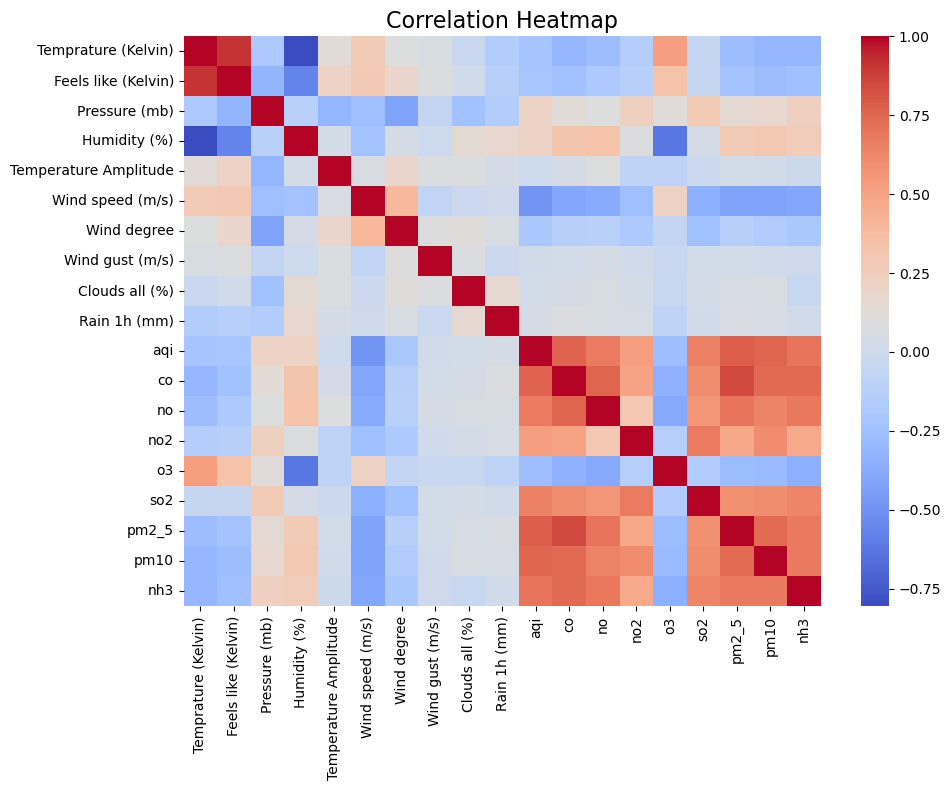

In [3]:
# Loại bỏ cột đầu tiên và 'timestamp' khỏi dữ liệu trước khi vẽ histogram
columns_to_plot = data.drop(data.columns[[0, data.columns.get_loc('timestamp')]], axis=1)

plt.figure(figsize=(10, 8))
correlation_matrix = columns_to_plot.corr()
sns.heatmap(correlation_matrix, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

## Nhận xét:
#### 1. Tương quan cao giữa các cột:
- Nhiệt độ (Temperature Kelvin) và nhiệt độ cảm nhận (Feels like Kelvin):
    + Tương quan dương rất cao (~1), điều này là hợp lý vì nhiệt độ cảm nhận thường phụ thuộc trực tiếp vào nhiệt độ thực tế.
- PM2.5 và PM10:
    + Tương quan dương rất mạnh, cho thấy hai loại bụi mịn này thường tăng giảm cùng nhau. Điều này thường xảy ra trong các khu vực ô nhiễm không khí cao hoặc do các nguồn phát thải tương tự (giao thông, công nghiệp).
- NO2 và các khí khác (NO, CO):
    + NO2 có tương quan dương cao với NO và CO, thể hiện rằng các khí này có nguồn gốc chung, ví dụ như hoạt động giao thông hoặc đốt nhiên liệu hóa thạch.

#### 2. Tương quan âm:
- Độ ẩm (Humidity) và Nhiệt độ:
    + Có tương quan âm đáng kể, điều này phù hợp với khí hậu nhiệt đới, nơi độ ẩm cao thường đi kèm với nhiệt độ thấp hơn (ví dụ: sau mưa).
- Mây (Clouds all) và nhiệt độ:
    + Có tương quan âm nhẹ, điều này phản ánh thực tế rằng trời nhiều mây có thể làm giảm nhiệt độ do giảm bức xạ mặt trời.
    
#### 3. Tương quan không rõ ràng (gần bằng 0):
- Rain 1h (Lượng mưa trong 1 giờ) và các khí độc (CO, NO, NO2):
    + Lượng mưa dường như không có mối liên hệ rõ ràng với các khí độc hại, cho thấy dữ liệu mưa không đủ để làm sạch không khí ở mức độ đáng kể hoặc tần suất mưa chưa ảnh hưởng lớn đến nồng độ khí.

#### 4. Yếu tố gió:
- Wind speed và các khí độc hại:
    + Tương quan thấp hoặc âm nhẹ, cho thấy tốc độ gió có thể giúp phân tán các khí độc hại, làm giảm nồng độ của chúng.

#### 5. AQI (Chỉ số chất lượng không khí):
- Tương quan cao với các khí độc hại (PM2.5, PM10, NO2):
    + Điều này cho thấy AQI được ảnh hưởng chủ yếu bởi các khí này, phù hợp với thực tế rằng bụi mịn và NO2 là những yếu tố chính ảnh hưởng đến chất lượng không khí.
    
## Kết luận:
- Các yếu tố thời tiết như nhiệt độ, độ ẩm và mây có mối liên hệ chặt chẽ với nhau, phản ánh rõ đặc điểm khí hậu nhiệt đới.
- Các loại khí ô nhiễm có mối tương quan cao, đặc biệt giữa bụi mịn (PM2.5, PM10) và khí NO2, cho thấy các nguồn ô nhiễm chung như giao thông và công nghiệp.
- Tốc độ gió và lượng mưa không có ảnh hưởng lớn đến việc giảm nồng độ khí độc hại, nhưng tốc độ gió có thể giúp làm giảm nhẹ ô nhiễm.

# 2. Histogram

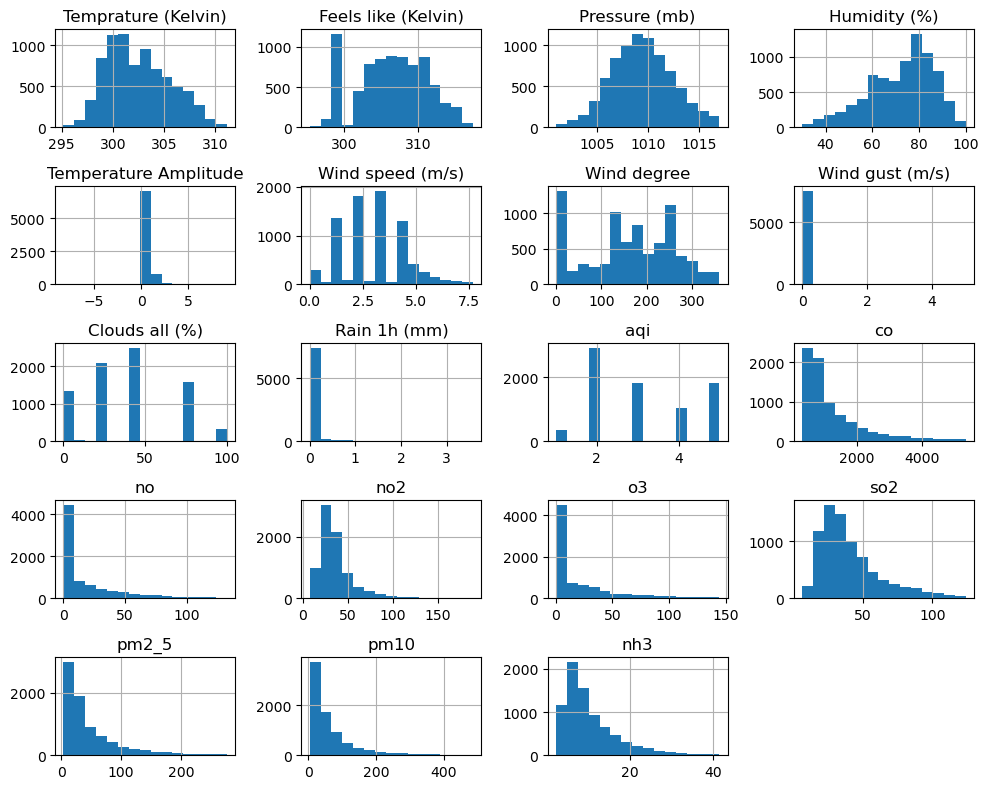

In [4]:
# Vẽ histogram cho các cột còn lại
columns_to_plot.hist(figsize=(10, 8), bins=15)
plt.tight_layout()
plt.show()

## Nhận xét
#### 1. Nhiệt độ:  
- Nhiệt độ thực tế (Temperature):
    + Nhiệt độ chủ yếu dao động trong khoảng từ 300K đến 310K (tương đương 27°C đến 37°C), phù hợp với đặc điểm khí hậu nhiệt đới gió mùa của TP. Hồ Chí Minh. Đây là mức nhiệt độ thường thấy vào các mùa khô và mùa mưa tại khu vực này.
- Nhiệt độ cảm nhận (Feels like):
    + Biểu đồ nhiệt độ cảm nhận có phân bố tương đồng với nhiệt độ thực tế. Điều này có thể được lý giải bởi độ ẩm cao trong khu vực, làm gia tăng cảm giác nóng bức, đặc biệt vào mùa khô khi trời ít mưa và ánh nắng mạnh.

#### 2. Áp suất không khí (Pressure):
- Khoảng áp suất 1005–1015 mb:  
Áp suất này tương đối ổn định và thường thấy ở vùng thấp, phù hợp với địa hình của Việt Nam.
    + Các biến đổi nhỏ trong áp suất có thể do ảnh hưởng của thời tiết như gió mùa hoặc áp thấp nhiệt đới.

#### 3. Độ ẩm (Humidity):
- Độ ẩm từ 60%–100% chiếm phần lớn thời gian trong năm, điều này phù hợp với đặc điểm khí hậu nhiệt đới gió mùa của TP. Hồ Chí Minh.
    + Mùa mưa (thường từ tháng 5 đến tháng 10): Độ ẩm cao do lượng mưa lớn và tần suất mưa dày đặc, tạo điều kiện cho không khí luôn ẩm ướt.
    + Mùa khô (thường từ tháng 11 đến tháng 4): Mặc dù có giảm nhẹ, nhưng độ ẩm vẫn giữ mức tương đối cao (60%-80%), đặc biệt vào sáng sớm.
- Độ ẩm và ảnh hưởng:
    + Độ ẩm cao có thể gây cảm giác oi bức, đặc biệt khi nhiệt độ cũng cao trong mùa hè.
    + Tuy nhiên, điều này cũng góp phần duy trì một hệ sinh thái phong phú, đặc trưng cho vùng nhiệt đới.

#### 4. Gió (Wind speed, Wind gust):
- Gió yếu, chủ yếu từ 0–2 m/s:
    + Điều này cho thấy hầu hết dữ liệu được thu thập trong điều kiện thời tiết yên tĩnh, không có bão hoặc gió mạnh.
    + Các cơn gió giật mạnh hiếm gặp, phù hợp với mùa khô hoặc khi không có áp thấp/bão.

#### 5. Lượng mưa (Rain 1h):
- Lượng mưa thấp:
    + Phần lớn dữ liệu cho thấy lượng mưa gần như bằng 0, chỉ một số ít có mưa (khoảng 1–3 mm), phù hợp với thời tiết mùa khô hoặc mưa không đáng kể.

#### 6. Tổng lượng mây (Clouds all):
- Các mức mây rõ rệt (0%, 50%, 100%):
    + Điều này có thể phản ánh các giai đoạn thời tiết điển hình: trời trong (0%), mây vừa phải (50%), hoặc mây hoàn toàn (100%).
    + Phù hợp với thời tiết nhiệt đới khi mây thường thay đổi nhanh chóng.

#### 7. AQI (Air Quality Index):
- Phân bố AQI:
    + Chỉ số chất lượng không khí (AQI) được phân bố ở một số mức cụ thể, với phần lớn dữ liệu tập trung tại các mức AQI từ 2 đến 4. Điều này cho thấy chất lượng không khí ở TP. Hồ Chí Minh dao động từ mức khá tốt đến trung bình, mặc dù có một số thời điểm chất lượng không khí suy giảm.
- Ý nghĩa:
    + Mức AQI cao hơn (từ 3–4) có thể phản ánh tình trạng ô nhiễm không khí tại thành phố do mật độ dân cư đông đúc, lưu lượng phương tiện giao thông lớn và hoạt động công nghiệp. Điều này phổ biến ở các khu vực đô thị lớn như TP. Hồ Chí Minh.

#### 8. Các khí độc hại (CO, NO, NO2, O3, SO2, PM2.5, PM10, NH3):
- Phân phối lệch phải:
    + Phần lớn các khí độc hại có nồng độ thấp, phù hợp với khu vực nông thôn hoặc khi không có ô nhiễm lớn.
    + Các giá trị ngoại lệ (cao bất thường) có thể liên quan đến:
        - Hoạt động giao thông và công nghiệp.
        - Sự gia tăng các hạt bụi mịn (PM2.5, PM10) thường gặp trong mùa khô hoặc tình trạng ô nhiễm.

## Kết luận:
- Điều kiện thời tiết: Dữ liệu phản ánh thời tiết ổn định, đặc trưng của khí hậu nhiệt đới thành phố Hồ Chí Minh, với nhiệt độ cao, độ ẩm lớn, ít gió và lượng mưa phân bố không đều.
- Chất lượng không khí: Mặc dù phần lớn dữ liệu cho thấy chất lượng không khí khá tốt, nhưng các giá trị ngoại lệ của khí độc hại và AQI cần được chú ý.